# Pre-Processing and Predicting Gesture From User Input

## Imports

In [1]:
#Imports for pre-processing
import cv2
import numpy as np

In [2]:
#Imports for prediction
from keras.models import load_model
import keras.utils as image
import matplotlib.pyplot as plt
from PIL import Image

## Pre-processing of Image

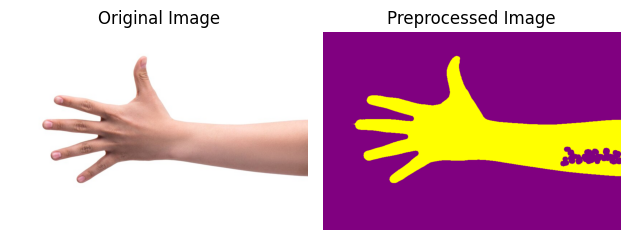

True

In [3]:
def process_image(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Adaptive thresholding
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Perform morphological operations to fill gaps in the foreground and background
    kernel_bg = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    closed_bg = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel_bg)

    kernel_fg = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    opened_fg = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel_fg)

    # Combine the foreground and background results
    filled = cv2.bitwise_or(closed_bg, opened_fg)

    # Find contours of the gesture
    contours, _ = cv2.findContours(filled, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask for the gesture contour
    mask = np.zeros_like(image)
    cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

    # Create the output image with isolated gesture and background colors
    output_image = np.where(mask == (255, 255, 255), (0, 255, 255), (128, 0, 128))

    # Convert output image to uint8 data type
    output_image = output_image.astype(np.uint8)

    return output_image
 

# Upload the image

#C:\Users\Izma Aziz\Downloads\User-input\fist.jpg
#C:\Users\Izma Aziz\Downloads\User-input\rad.jpg
#C:\Users\Izma Aziz\Downloads\User-input\thumbs.jpg
#C:\Users\Izma Aziz\Downloads\User-input\peace.jpg
#C:\Users\Izma Aziz\Downloads\User-input\ok.jpg
#C:\Users\Izma Aziz\Downloads\User-input\straight.jpg
#C:\Users\Izma Aziz\Downloads\User-input\hand.jpg

image_path = r"C:\Users\Izma Aziz\Downloads\User-input\hand.jpg"
result = process_image(image_path)

# Create a figure with subplots
fig, axs = plt.subplots(1, 2)

# Plot the original image
axs[0].imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image")

# Plot the preprocessed image
axs[1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
axs[1].set_title("Preprocessed Image")

# Remove the axis labels
for ax in axs:
    ax.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()

# Display the figure
plt.show()

# Save the preprocessed image
cv2.imwrite('hand-preprocessed.jpg', result)



## Predicting the Hand Gesture

In [4]:
#Class Labels
class_labels={'fist': 0, 'five': 1, 'none': 2, 'okay': 3, 'peace': 4, 'rad': 5, 'straight': 6, 'thumbs': 7}

# Load the saved model
loaded_model = load_model('gesture_model.h5')

Input the path of the image or press enter to stop: C:\Users\Izma Aziz\Downloads\User-input\Incorrect-processed\straight-preprocessed.jpg


1/1 [==============================] - 0s 130ms/step


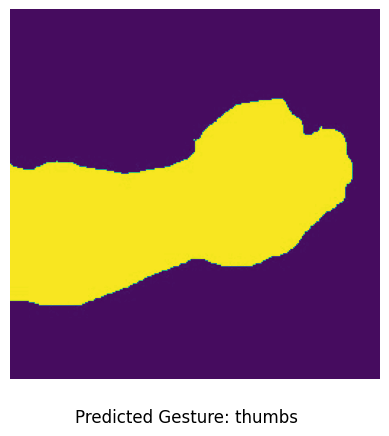

Input the path of the image or press enter to stop: 


In [9]:
# Load the image for prediction
image_path = input("Input the path of the image or press enter to stop: ")
while True:
    
    
    if image_path == '':  # Check if backspace is entered
        break  # Exit the loop if backspace is entered
    else:
        
        print('\n')
        img = image.load_img(image_path, target_size=(256, 256), grayscale=True)

        # Preprocess the image
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        # Make prediction
        prediction = loaded_model.predict(img_array)
        predicted_class = np.argmax(prediction)

        # Get the class label
        gesture_label = list(class_labels.keys())[list(class_labels.values()).index(predicted_class)]

        # Plot the input image in the center
        fig, ax = plt.subplots()
        ax.imshow(img)
        ax.axis('off')

        # Add the predicted gesture label as the title
        #plt.suptitle(f'Predicted Gesture: {gesture_label}', fontsize=12, y=0.02)
        fig.text(0.5, 0.02, f'Predicted Gesture: {gesture_label}', fontsize=12, ha='center')
        plt.show()
        
        plt.pause(3)
        
        # Load the image for prediction
        image_path = input("Input the path of the image or press enter to stop: ")


In [6]:
####  Correct Output:

#C:\Users\Izma Aziz\Downloads\User-input\fist-preprocessed.jpg
#C:\Users\Izma Aziz\Downloads\User-input\rad-preprocessed.jpg
#C:\Users\Izma Aziz\Downloads\User-input\thumbs-preprocessed.jpg
#C:\Users\Izma Aziz\Downloads\User-input\none.png

### Incorrect Output:

#C:\Users\Izma Aziz\Downloads\User-input\Incorrect-processed\peace-preprocessed.jpg
#C:\Users\Izma Aziz\Downloads\User-input\Incorrect-processed\ok-preprocessed.jpg
#C:\Users\Izma Aziz\Downloads\User-input\Incorrect-processed\hand-preprocessed.jpg
#C:\Users\Izma Aziz\Downloads\User-input\Incorrect-processed\straight-preprocessed.jpg